In [26]:
import numpy as np
import pandas as pd
test=pd.read_csv(r'C:\Users\ASUS\Desktop\Ma_ler\Dsets\digit_test.csv')
X_train=pd.read_csv(r'C:\Users\ASUS\Desktop\Ma_ler\Dsets\digit_train.csv')
Y_train=X_train['label']
X_train.drop(columns=['label'],inplace=True)
X_train.head()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.2)

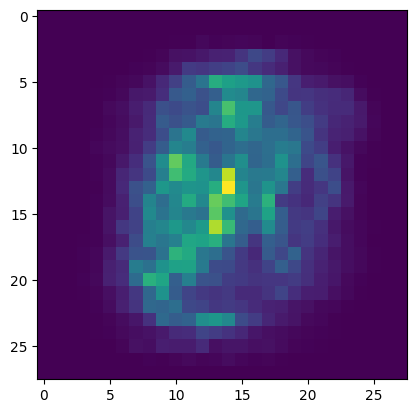

In [27]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model=RandomForestClassifier()
model.fit(X_train,Y_train)
model.feature_importances_
plt.imshow(model.feature_importances_.reshape(28,28))
plt.show()

In [28]:
from sklearn.decomposition import PCA
model=PCA()
model.fit(X_train,Y_train)
eigen_values=model.explained_variance_*(X_train.shape[0]-1)
sum=np.sum(eigen_values)
print(sum)
sorted(eigen_values,reverse=True)
curr=0
count=0
for i in eigen_values:
    count+=1
    curr+=i
    if(curr>=0.95*sum):break
print(count)

115429556446.04375
153


In [30]:
model=PCA(n_components=200)
model.fit_transform(X_train)
model.transform(X_test)
model.transform(test)

array([[ 848.57488761, -103.28967077,  785.15118778, ...,   48.82345445,
          21.43889847,  -83.11909683],
       [1152.45930063,  -12.26033003,  200.82673362, ...,   36.68214473,
          29.40572048,   -3.31022386],
       [-507.66718978,   90.21043104,  164.90794245, ...,   17.85568727,
         -32.76897089,  -89.10380411],
       ...,
       [-135.05765078, -662.91741055, -861.76465949, ...,  -39.37815032,
           3.98439358,   45.58714812],
       [ -72.29747679,  574.93796806, -323.85861348, ...,  -20.26127287,
          11.81229904,    3.86452584],
       [ 595.29461772,  162.43029657,  817.95743539, ...,  -14.74613902,
          46.63633281,  -23.61147366]])

In [32]:
from sklearn.metrics import accuracy_score
params=dict()
params={
    'n_estimators':[10,50,100,200],
    'n_jobs':[-1],
    'criterion':['gini','entropy'],
}
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,verbose=True,scoring='accuracy')
model.fit(X_train,Y_train)
print(model.best_params_,model.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'gini', 'n_estimators': 200, 'n_jobs': -1} 0.9624404761904761


In [49]:
model=RandomForestClassifier(n_estimators=200,n_jobs=-1,criterion='gini')
model.fit(X_train,Y_train)
res=pd.DataFrame()
res['Label']=model.predict(X_test)
print(accuracy_score(Y_test,res))
k=pd.DataFrame()
k['Label']=model.predict(test)

0.9654761904761905


In [57]:
k['ImageId']=k.index+1
k.reset_index(drop=True)
k.to_csv('Result.csv',index=False)